# Pneumonia Detection from X-Ray images

## Introduction

- Objective: Detect pneumonia from X-Ray images using Machine Learning
- Datasets: Train, Validation and Test sets of JPEG images

The objective of this project is to develop a Machine Learning model to detect pneumonia from X-Ray images.

We will use these 3 datasets: Train, Validation and Test. 

Each containing JPEG images categorized as either normal or pneumonia-affected. 

The following steps outline our approach to achieve this goal.

# Import necessary libraries

In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# Define the directories for the datasets

In [59]:
base_dir = "../chest_Xray"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
val_dir = os.path.join(base_dir, "val")

# Initialize ImageDataGenerator for data augmentation

(ImageDataGenerator is a class of Keras API for generating batches of image data with realtime data augmentation.)

/train_datagen/

rescale: rescale image pixel values from a range of [0, 255] to [0, 1]

common practice to normalize pixel values for neural network inputs to improve convergence

flip: flip image horizontally. Useful for augmenting image data because it creates new examples from existing images



/val_test_datagen/

scale the pixel values from [0, 255] to [0, 1]. 

No other augmentations are applied to validation and test data because these datasets should represent the true distribution of the data

we want to evaluate our model on unaltered images.

In [60]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1./255)

Create data generators

flow_from_directory is a method provided by the ImageDataGenerator class to read images from a directory and generate batches of augmented data.

target_size: resize all images to 150x150 pixels

batch_size: return batches of 32 images

class_mode='binary': classes are binary, two classes ('Pneumonia' and 'Normal')

In [61]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
val_generator = val_test_datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = val_test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [62]:
# Display class indices
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}
{'NORMAL': 0, 'PNEUMONIA': 1}
{'NORMAL': 0, 'PNEUMONIA': 1}


# Visualize Sample Images

A plot is a graphical representation of data. In the context of Matplotlib:
- Plots can display data in various forms such as line charts, bar charts, images, etc.

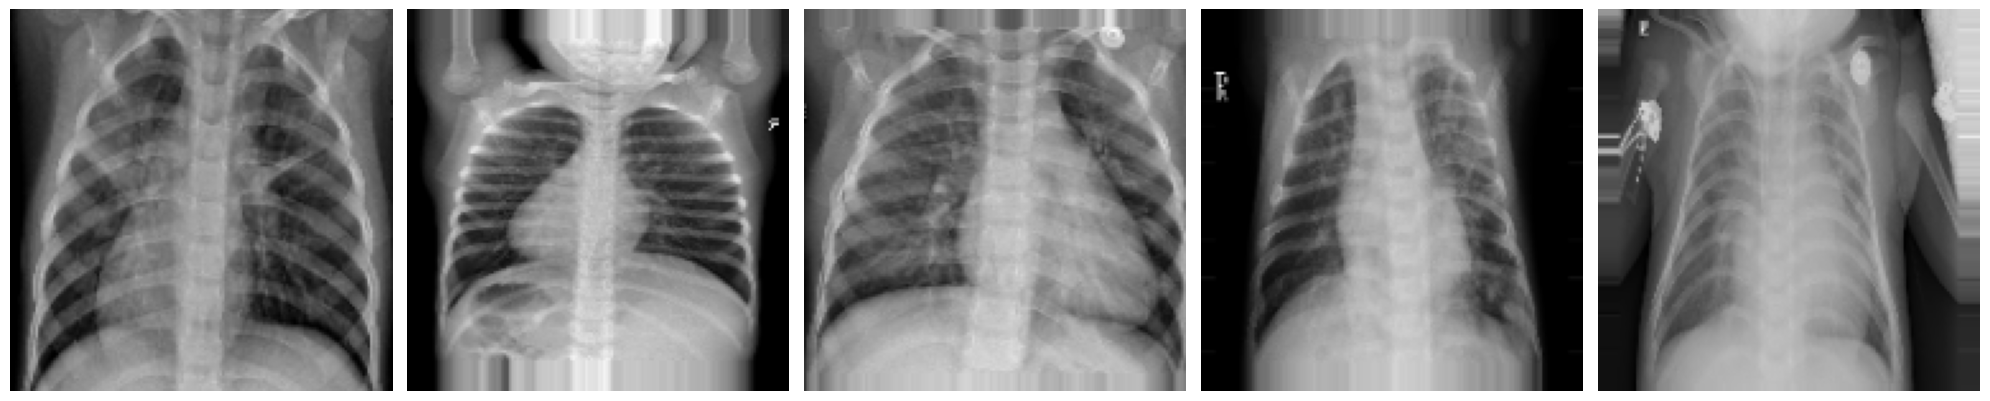

In [63]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Fetch a batch of images
sample_training_images, _ = next(train_generator)

# Plot the images
plot_images(sample_training_images[:5])

# ImageDataGenerator for preprocessing (normalization)

Image preprocessing is the process of manipulating raw image data into a usable and meaningful format

It allows you to eliminate unwanted distortions and enhance specific qualities essential for computer vision applications

Preprocessing is a crucial first step to prepare image data before feeding it into machine learning models


Normalization: Adjust the intensity values of pixels to a desired range, often between 0 and 1. This can improve the performance of machine learning models.

In [64]:
""" 
ImageDataGenerator for preprocessing (normalization)

"""



' \nImageDataGenerator for preprocessing (normalization)\n\n'